## Optimization exercise

**Goal: Train the 2nd order polynomial predictor using gradient descent. Optimize the stepsizes and compare against scikit-learn's implementation.**

In [34]:
import pandas as pd
import numpy as np
# from datetime import datetime
import seaborn as sns


In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#### Task I
Download the data from [here](https://drive.google.com/file/d/0Bz9_0VdXvv9bUUNlUTVrMF9VcVU/view?usp=sharing&resourcekey=0-16O9Fc5eaJH99-M7AHqHOg).

In [36]:
data_path = ''
nb = pd.read_csv(data_path+'nba_games_2013_2015.csv', delimiter=';')
x = nb[['AST','REB','STL']]
y = nb['PTS']
x.head()

,AST,REB,STL
0,41,43,14
1,23,43,8
2,20,39,7
3,19,47,6
4,21,43,4



#### TASK II
Create a function `psi(x)`, which transforms features AST (assists), REB (rebounds) and STL (steals) into 2nd order polynomial features (add each feature squared and each pair of features multiplied with every other)

**Input:** DataFrame x from above. It contains columns AST, REB, STL

**Output:** DataFrame with columns: AST, REB, STL, 1, AST^2, REB^2, STL^2, ASTSTL, REBSTL, ASTREB. The number of rows should be the same as Input.

In [37]:
def psi(x):
    deg = 2
    poly_feats = PolynomialFeatures(degree=deg)
    # this takes the features and creates the polynomial but without the weights, e.g.
    # x1^2, x1*x2, x^2
    X_deg = poly_feats.fit_transform(x)
    
    return X_deg
    

In [38]:
# def psi(x):
#     deg = 2
#     poly_feats = PolynomialFeatures(degree=deg)
#     # this takes the features and creates the polynomial but without the weights, e.g.
#     # x1^2, x1*x2, x^2
#     X_deg = poly_feats.fit_transform(x)
#     X_poly_feat_names = poly_feats.get_feature_names_out(x.columns.to_list()) 

#     df_poly = pd.DataFrame(X_deg, columns=X_poly_feat_names)
#     # print(df_poly.columns)
#     # reorder the columns to be compatible with exercise requirement
#     columns1 = df_poly.filter(items=x.columns.to_list())
#     columns2 = df_poly['1']
#     columns3 = df_poly.filter(regex='\^2')
#     columns4 = df_poly.filter(items=list(set(df_poly.columns.to_list()) - set(columns1.columns.to_list()) - set(columns2.name) - set(columns3.columns)))

#     X = pd.concat([columns1,columns2,columns3,columns4],axis=1)
#     return X
    

#### Task III
Create a transformed data matrix **X**, where each **x** is mapped to psi(x).

HINT: We need to apply our function from Task II to matrix (DataFrame) x

In [138]:
X = psi(x)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,1.0,41.0,43.0,14.0,1681.0,1763.0,574.0,1849.0,602.0,196.0
1,1.0,23.0,43.0,8.0,529.0,989.0,184.0,1849.0,344.0,64.0
2,1.0,20.0,39.0,7.0,400.0,780.0,140.0,1521.0,273.0,49.0
3,1.0,19.0,47.0,6.0,361.0,893.0,114.0,2209.0,282.0,36.0
4,1.0,21.0,43.0,4.0,441.0,903.0,84.0,1849.0,172.0,16.0
...,...,...,...,...,...,...,...,...,...,...
7375,1.0,17.0,39.0,10.0,289.0,663.0,170.0,1521.0,390.0,100.0
7376,1.0,26.0,40.0,10.0,676.0,1040.0,260.0,1600.0,400.0,100.0
7377,1.0,23.0,52.0,8.0,529.0,1196.0,184.0,2704.0,416.0,64.0
7378,1.0,23.0,41.0,11.0,529.0,943.0,253.0,1681.0,451.0,121.0


#### Task IV
Create a function `p2(x,w)`, which outputs the value of the polynomial ata given row of `x` for given parameters `w`.

Inputs:
- x: DataFrame from above
- w: vector which represents beta coeficients for each column of X from the Task III.

Ouputs:
- Series of the same length as DataFrame x. Each value is a dot product of particular row in DataFrame and coeficients `w`.


HINT:
- length of w needs to be the same as number of columns of the dataframe that is returned from function `psi(x)`

Example Input:

`p2(x, [0.06, 0.05,0.03,0.01,0.02,0.02,0.04, 0.03,0.02,0.01])`

Example Output:

```
0       130.37
1        76.19
2        61.21
3        74.51
4        64.97
         ...  
7375     63.01
7376     79.59
7377     97.25
7378     78.85
7379     61.53
Length: 7380, dtype: float64

```

Our columns in the DataFrame **X** that is the output of `psi(x)` were in this order: `AST, REB, STL, 1, AST^2, REB^2, STL^2, ASTSTL, REBSTL, ASTREB`. If your columns are in different order the result can be different even for the **w**.

In [123]:
w = [0.06, 0.05,0.03,0.01,0.02,0.02,0.04, 0.03,0.02,0.01]
def p2(x,w):
    # print(psi(x).shape)
    return np.dot(x,w)
    
y_pred = p2(X, w)
y_pred.shape

(7380,)

In [31]:

# def p2(x,w):
#     return x@w

# y_pred = p2(x, w)
# y_pred.shape

ValueError: Dot product shape mismatch, (7380, 3) vs (10,)

#### Task V
Create a function `Loss(x,y,w)`, which computes the squared loss of predicting **y** from **x** by `p2(x,w)` using parameters **w**. We have specified **y** as the variable PTS above. We will predict scored points (PTS) based on assists, rebounds and steals.


HINTS: 
- Output of `p2(x,w)` represents our predictions. `y_pred = p2(x,w)`
- Loss can be computed as:

```
np.mean((y_pred - y)**2)
```

In [48]:
def Loss (x,y,w):
    return np.mean((p2(x,w)-y)**2)

Loss(x,y,w)

(7380, 10)


524.5718913821138

In [25]:
w

[0.06, 0.05, 0.03, 0.01, 0.02, 0.02, 0.04, 0.03, 0.02, 0.01]

#### Task VI
Code up the gradient descent. It should input **x**, target variable **y**, stepsize **alpha**, coeficients **w** and **maximum number of iterations**.

Steps:
1. transform input `x`
2. compute initial loss for given, x,y and w and append it to the empty list.
3. Inside the for loop, update each element of **w**, **w[i]**, using gradient descent.

HINT: `w[i] = w[i] - alpha * (1.0 / m) * errors_i.sum()` where `errors_i = (y_pred - y) * X.iloc[:, i]`. We are scaling the errors by multiplicating with values that are relevant for coeficients `w[i]` (column `i` of DataFrame `X`, output of `psi(x)`).

4. compute new loss using updated `w` and append to the list that we created in the step 2.
5. repeat steps 3 and 4 for max number of iterations times.

In [57]:
x

,AST,REB,STL
0,41,43,14
1,23,43,8
2,20,39,7
3,19,47,6
4,21,43,4
...,...,...,...
7375,17,39,10
7376,26,40,10
7377,23,52,8
7378,23,41,11


In [140]:

def gradient_descent(x,y,alpha,w,max_iterations):
    X = psi(x)
    # print(x.shape)
    print(X.shape)
    print(y.shape)
    past_costs = []
    # print(X.shape)
    # past_costs.append(Loss(X,y,w)) # compute initial loss for given, x,y and w and append it to the empty list for past_costs
    for i in range(max_iterations):
        y_pred = p2(X,w) 
        error = y - p2(X,w) # actual value of the target minus predicted value of the target gives us the error
        error = error.reshape(-1,1) # reshape error so that it is shape (7380,1)
        # print(y.shape)
        print(error.shape)
        print(psi(x).shape)
        grad = -(1.0 / y.size) * (error*psi(x)).sum() # gradient is the derivative of the loss function
        print(grad)
        w = w - alpha * grad # new coefficents are calculated by stepping 'downhill' in the direction opposite the gradient 
            
        past_costs.append(Loss(X,y,w)) # compute loss for new w and append it to the list
    
    # return past_costs, w

w = [0.06, 0.05,0.03,0.01,0.02,0.02,0.04, 0.03,0.02,0.01]
alpha = .0000001
max_iterations = 100
# p2(x,w).shape
gradient_descent(x,y.values,alpha,w,max_iterations)
       

(7380, 10)
(7380,)
(7380, 1)
(7380, 10)
28427.81280894309
(7380, 1)
(7380, 10)
-20458.119702834865
(7380, 1)
(7380, 10)
14722.71766345152
(7380, 1)
(7380, 10)
-10595.22666531621
(7380, 1)
(7380, 10)
7624.871348861459
(7380, 1)
(7380, 10)
-5487.250525466058
(7380, 1)
(7380, 10)
3948.908375185042
(7380, 1)
(7380, 10)
-2841.83805409215
(7380, 1)
(7380, 10)
2045.1331756482816
(7380, 1)
(7380, 10)
-1471.7832707301757
(7380, 1)
(7380, 10)
1059.1711199025608
(7380, 1)
(7380, 10)
-762.2341438077451
(7380, 1)
(7380, 10)
548.5429871235269
(7380, 1)
(7380, 10)
-394.75981385362553
(7380, 1)
(7380, 10)
284.0895140249985
(7380, 1)
(7380, 10)
-204.44546062350904
(7380, 1)
(7380, 10)
147.1294937196363
(7380, 1)
(7380, 10)
-105.88196899152811
(7380, 1)
(7380, 10)
76.19812366707188
(7380, 1)
(7380, 10)
-54.836098210878426
(7380, 1)
(7380, 10)
39.462883366148674
(7380, 1)
(7380, 10)
-28.399525392623445
(7380, 1)
(7380, 10)
20.437762619705705
(7380, 1)
(7380, 10)
-14.708067656930785
(7380, 1)
(7380, 10)
1

#### Task VII
Choose an arbitrary **w** and **alpha** and run gradient descent for 100 iterations. How does the loss behave? Does it converge to something?


10 10
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[501.9157970055969, 490.18224285903807, 484.10545439663974, 480.95829561120325, 479.3283872340995, 478.48426035685196, 478.04708843056363, 477.82067780641944, 477.70342011523906, 477.6426925491503]


<AxesSubplot: >

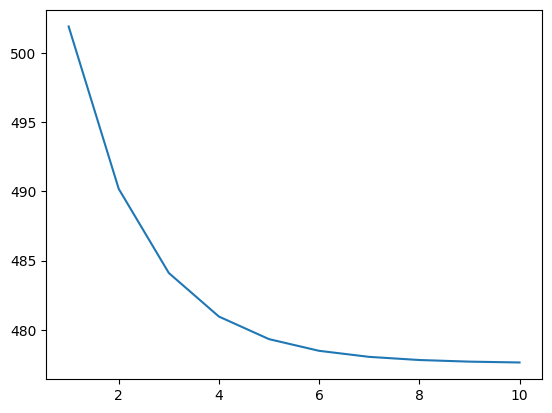

In [119]:
max_iter = 10
w = [0.06, 0.05,0.03,0.01,0.02,0.02,0.04, 0.03,0.02,0.01]
alpha = .0000001

loss, w_history = gradient_descent(x,y.values,alpha,w,max_iter)
iterations = [i+1 for i in range(len(w_history))]
print(len(iterations), len(loss))
print(iterations)
print(loss)
sns.lineplot(x=iterations,y=loss)

#### Task VIII
Can you find which **alpha** from `[1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]` has the smallest loss after 100 iterations for a given **w**?